In [1]:
import sys
sys.path.insert(0, '_libs/')
import NEMO_tools as Nts
from Mat2Py import datenum2datetime, datetime2datenum_single

In [2]:
import glob
import scipy.io
import datetime
import numpy as np
import matplotlib.pyplot as plt
#from seaborn import xkcd_rgb as xcolor
% matplotlib inline
from mpl_toolkits.basemap import Basemap, cm

In [121]:
MAT = scipy.io.loadmat('../../Arctic-obs/MATLAB files/KBrown_Ba.mat')
lat = MAT['lat']
lon = MAT['lon']
Ba = MAT['Ba']
time = MAT['Time']
River_names = MAT['River_names']
Ba_CPM = MAT['Ba_CPM']
time_CPM = MAT['Time_CPM']
Ba_FC = MAT['Ba_FC']
time_FC = MAT['Time_FC']

In [122]:
names = ["" for x in range(len(Ba))]
for i in  range(len(Ba)):
    names[i] = str(River_names[i][0][0][0:8])

In [123]:
center_lat=71; center_lon=-99; coef=0.11
ref_proj=Basemap(projection='ortho', lat_0=center_lat, lon_0=center_lon, resolution=None)
width=(ref_proj.urcrnrx-ref_proj.llcrnrx)*coef  
height=(ref_proj.urcrnry-ref_proj.llcrnry)*coef  

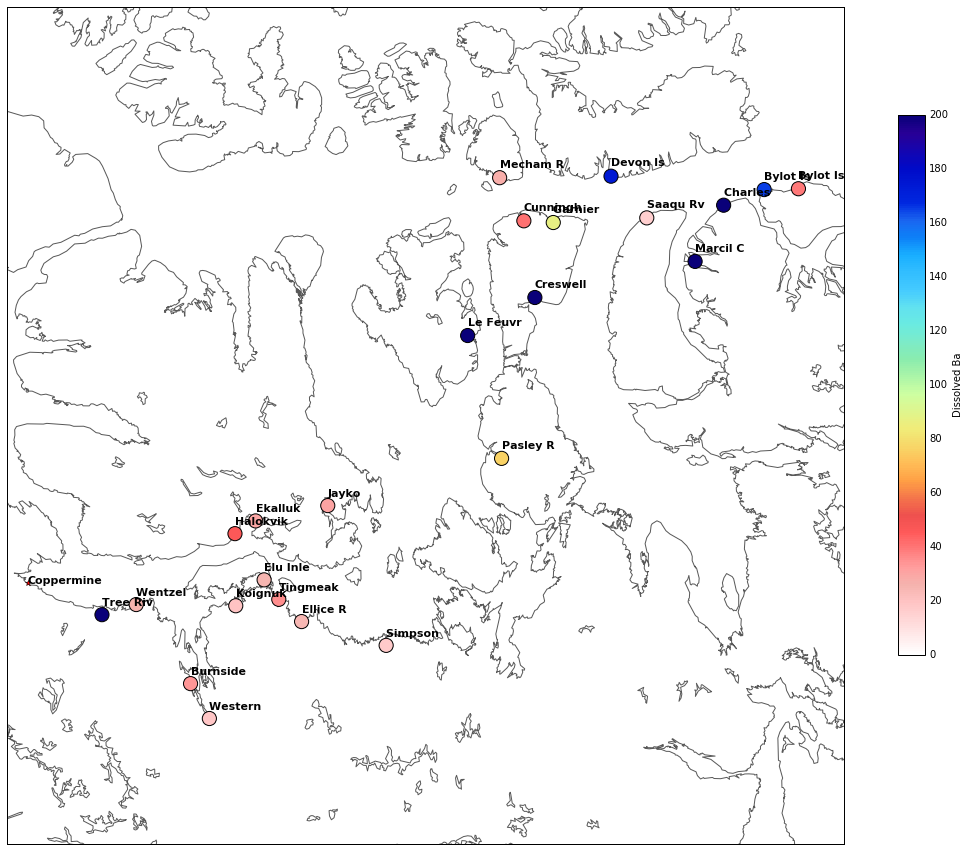

In [124]:
fig=plt.figure(figsize=(15, 15)); ax=plt.gca()
proj=Basemap(projection='ortho',\
            lat_0=center_lat, lon_0=center_lon, resolution='i',\
            llcrnrx=-0.5*width, llcrnry=-0.5*height, \
            urcrnrx=0.5*width, urcrnry=0.5*height)

proj.drawcoastlines(linestyle='-', color=[0.35, 0.35, 0.35], linewidth=1, zorder=1)
x, y=proj(lon, lat)
x_CPM, y_CPM = proj(-115.0765143, 67.8173037)
CS = proj.scatter(x, y, c=Ba, vmin=0, vmax=200, s=200, cmap=cm.GMT_haxby_r)
proj.plot(x_CPM, y_CPM, 'r*')
for i in range(len(x)):
    plt.text(x[i], y[i]*1.0025, names[i], fontsize=11, fontweight='bold')
plt.text(x_CPM, y_CPM, 'Coppermine', fontsize=11, fontweight='bold')
    
cax = fig.add_axes([0.95, 0.3, 0.025, 0.5])
CBar=plt.colorbar(CS, cax=cax)
CBar.set_label('Dissolved Ba', fontsize=10)
CBar.ax.tick_params(axis='y', length=0)